# Libraries

In [94]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import numpy as np

# Data

In [95]:
data = pd.read_csv('Housing.csv')
display(data.head(10))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


Data Information 

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [97]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# EDA

ScatterPlot 

In [98]:
scatter = px.scatter(data, x='area', y='price', color='prefarea',
                        symbol='furnishingstatus', facet_col='basement', facet_row='guestroom',
                        title='Data Image')
scatter.show()

Histogram

In [99]:
hist = px.histogram(data, x='area', color='price', barmode='overlay')
hist.show()

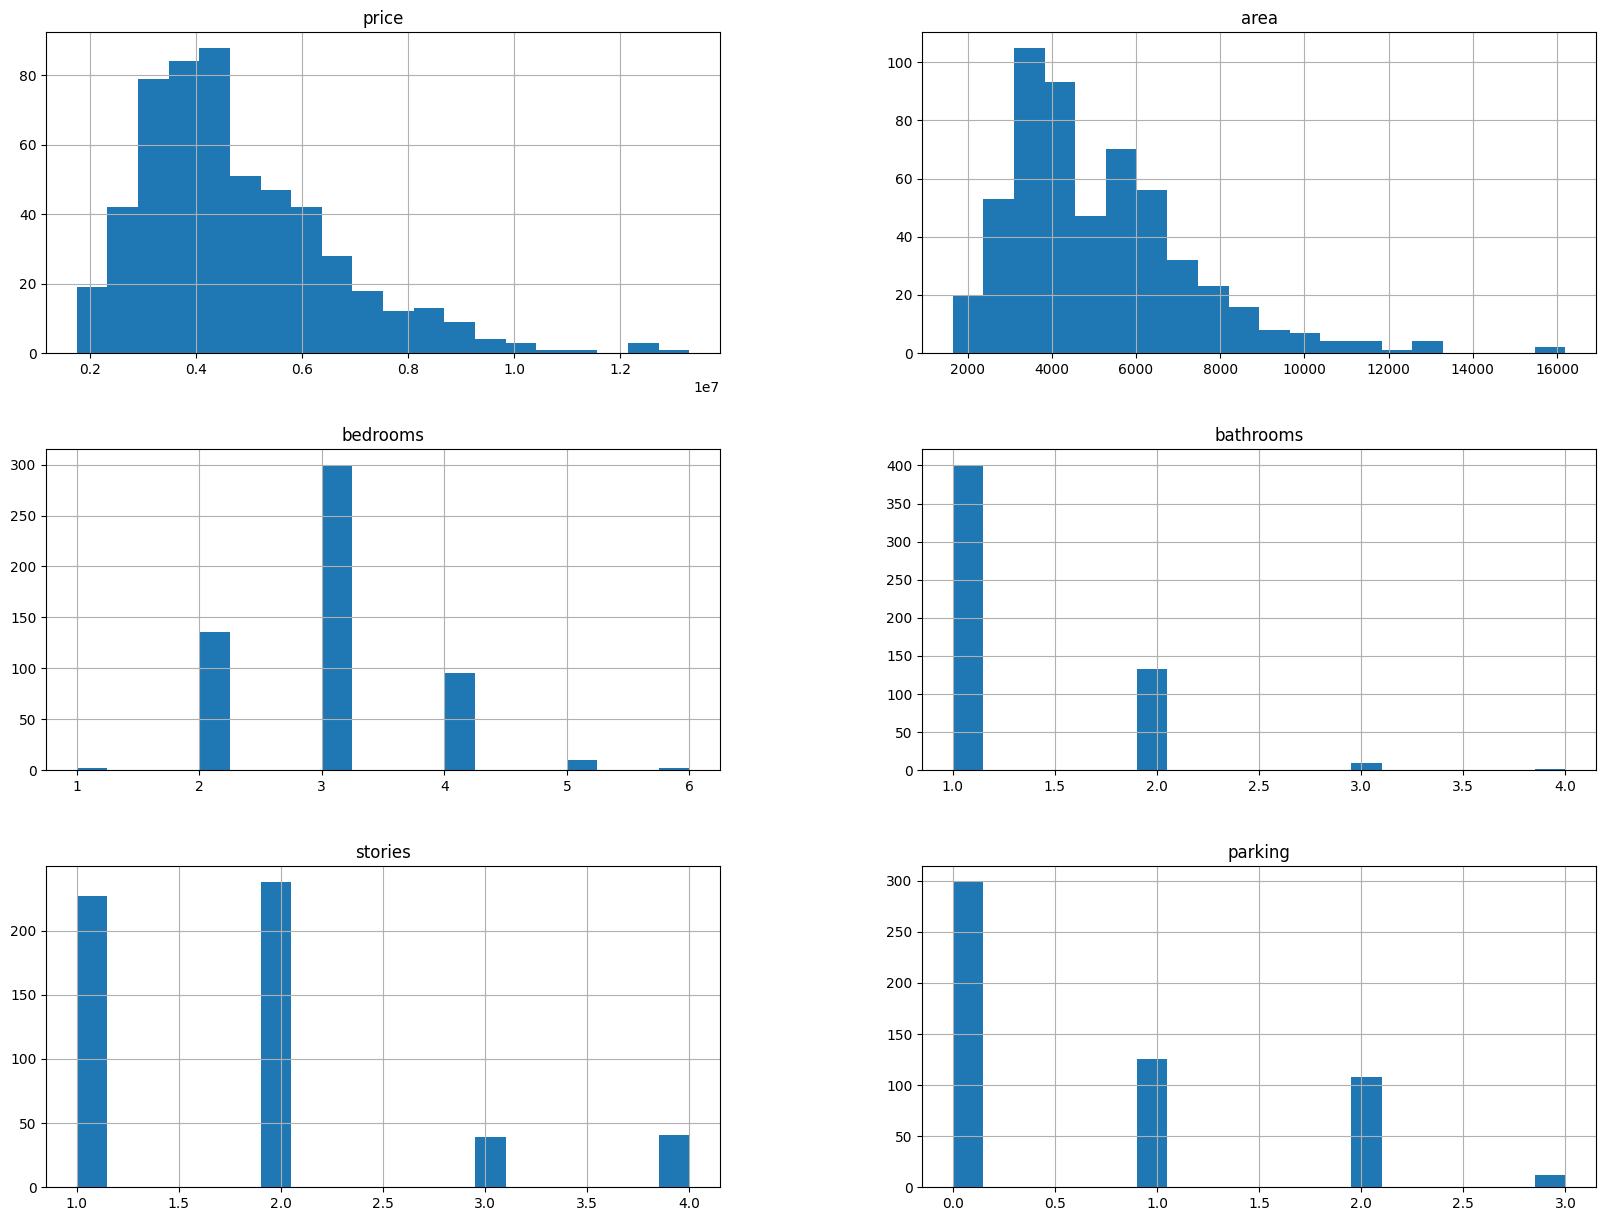

In [100]:
data.hist(bins=20, figsize=(20, 15))
plt.show()

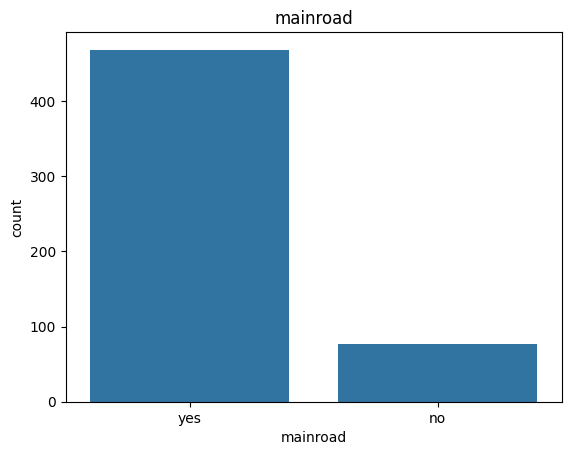

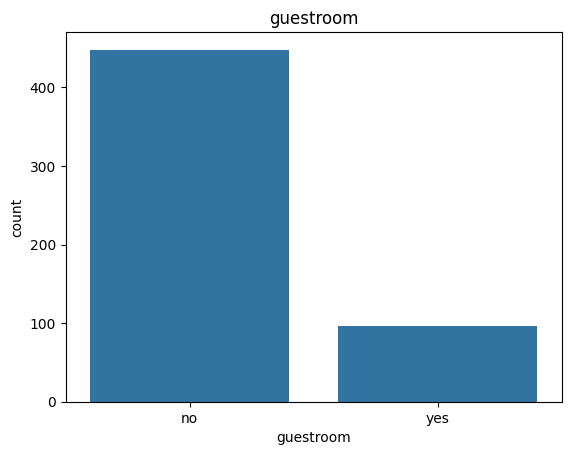

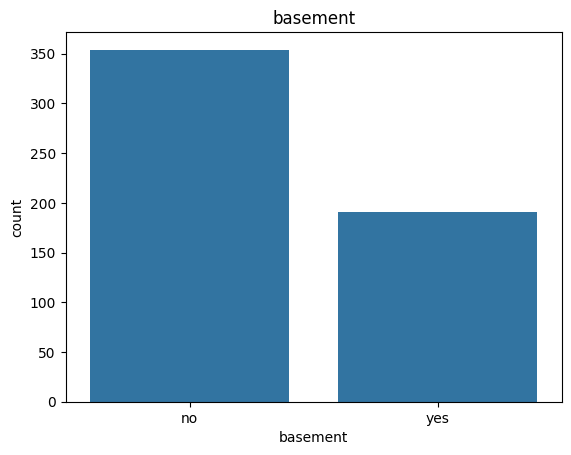

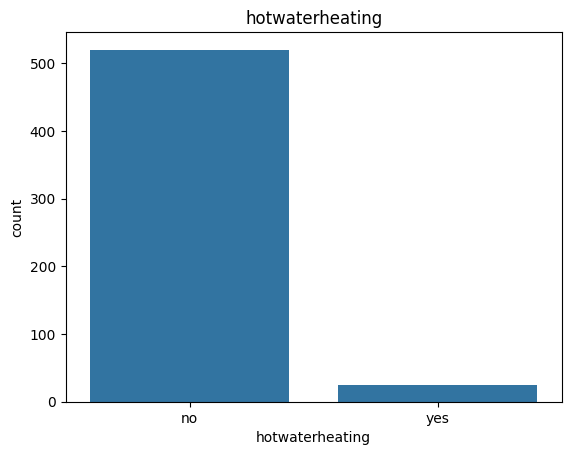

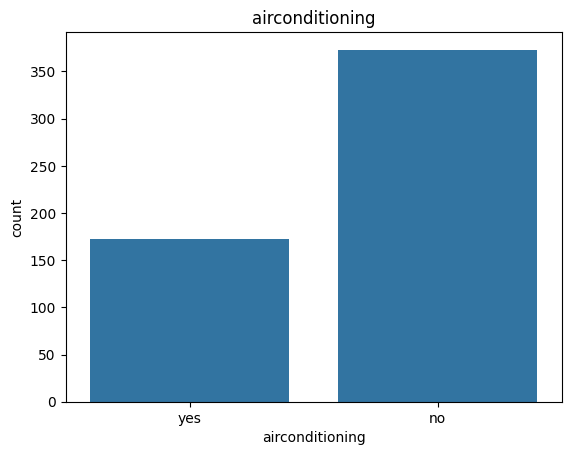

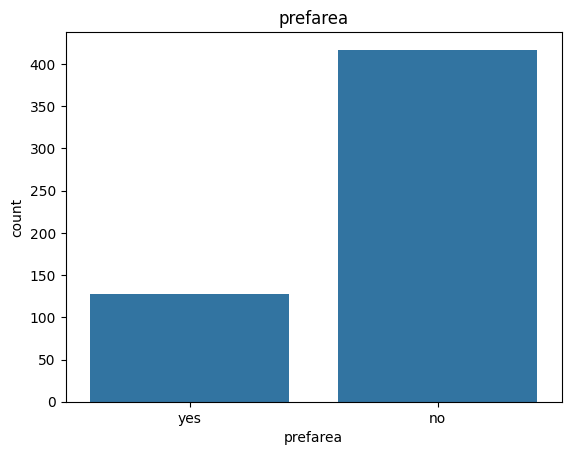

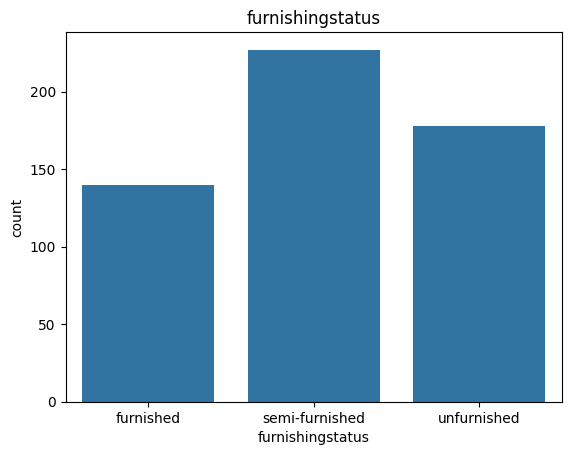

In [101]:
column = ['mainroad', 'guestroom','basement', 'hotwaterheating', 'airconditioning',  'prefarea',
        'furnishingstatus']
for col in column:
        sns.countplot(data = data, x=col)
        plt.title(col)
        plt.show()

Correlation Matrix

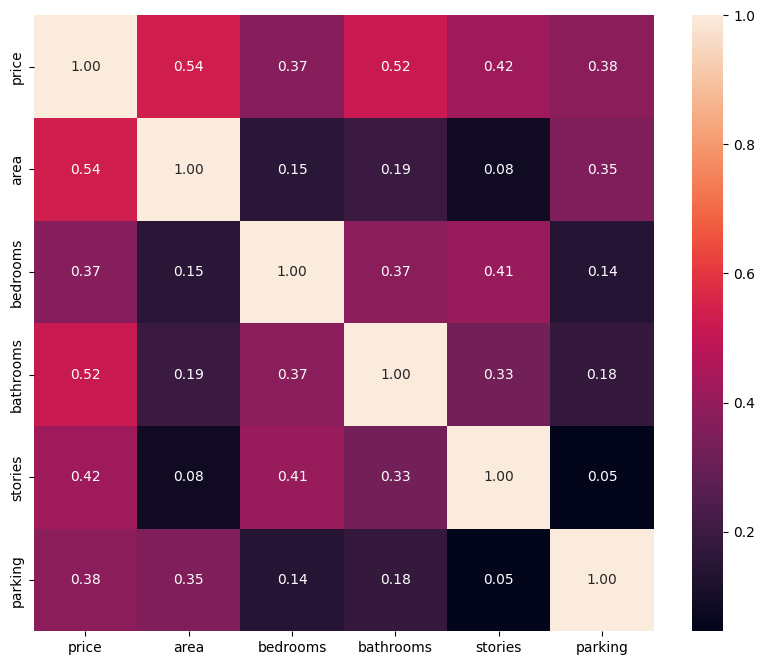

In [102]:
numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

# Data Preprocessing

Splitting the Dependent and Independent Variable

In [103]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

In [104]:
display(X.head(5))

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [105]:
display(y.head(5))

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

Encoding Categorical Variable

In [106]:
from sklearn.preprocessing import LabelEncoder
columns_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
le = LabelEncoder()
X[columns_to_encode] = X[columns_to_encode].apply(lambda col: le.fit_transform(col))
display(X.head(5))

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [107]:
from sklearn.preprocessing import OneHotEncoder
X = pd.get_dummies(X, columns=['furnishingstatus'], drop_first=True)
display(X.head(5))

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,7420,4,1,2,1,1,1,0,1,2,0,False,False


In [108]:
#Implementing Numpy array
X_arr = X.values
y_arr = y.values

# Splitting the Dataset

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.2, random_state=0)

# Model Training

In [110]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

# Predicting the Result

In [115]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 3950288.62  4585000.  ]
 [ 6173868.82  6083000.  ]
 [ 4483635.99  4007500.  ]
 [ 7258732.75  6930000.  ]
 [ 2836727.58  2940000.  ]
 [ 7032947.1   6195000.  ]
 [ 3203851.47  3535000.  ]
 [ 3270994.01  2940000.  ]
 [ 3472554.04  3500000.  ]
 [ 8289978.33  7980000.  ]
 [ 6605321.63  6755000.  ]
 [ 3723366.24  3990000.  ]
 [ 3812376.96  3150000.  ]
 [ 4548966.85  3290000.  ]
 [ 4020476.35  4130000.  ]
 [ 1969836.22  2660000.  ]
 [ 4057262.98  4410000.  ]
 [ 3704586.87  3710000.  ]
 [ 3282767.93  3360000.  ]
 [ 4609423.65  4270000.  ]
 [ 5968243.74  5005000.  ]
 [ 6363698.62  5383000.  ]
 [ 4751300.32  6440000.  ]
 [ 2659595.28  1890000.  ]
 [ 5305573.25  6125000.  ]
 [ 5680819.59  5460000.  ]
 [ 5404106.9   5803000.  ]
 [ 5543050.52  4620000.  ]
 [ 5768360.48  5530000.  ]
 [ 5801753.71  5950000.  ]
 [ 3389277.96  4305000.  ]
 [ 6399092.03  3640000.  ]
 [ 7081030.31  5250000.  ]
 [ 2913042.4   3325000.  ]
 [ 4498664.01  3703000.  ]
 [ 5210561.68  4753000.  ]
 [ 5013457.84  9100000.  ]
 

# Accuracy Score

In [116]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.6611214250980098
